### 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load the Dataset

In [2]:
df = pd.read_csv("../data/raw/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 3. Explore Data Structure

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##### Displays column types, non-null counts, and memory usage.

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##### Gives statistical summary: mean, std, min, max, quartiles, etc.

#### Lists all column names 

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

#### 2A. Rename Column Names 

In [8]:
# View original column names
print(df.columns.tolist())

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [9]:
df.rename(columns={
    'Pregnancies': 'pregnancies',
    'Glucose': 'glucose',
    'BloodPressure': 'blood_pressure',
    'SkinThickness': 'skin_thickness',
    'Insulin': 'insulin',
    'BMI': 'bmi',
    'DiabetesPedigreeFunction': 'pedigree_function',
    'Age': 'age',
    'Outcome': 'diabetic'
}, inplace=True)

# Confirm the change
print(df.columns.tolist())


['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'pedigree_function', 'age', 'diabetic']


### 4. Check for Missing Values

In [10]:
df.isnull().sum()

pregnancies          0
glucose              0
blood_pressure       0
skin_thickness       0
insulin              0
bmi                  0
pedigree_function    0
age                  0
diabetic             0
dtype: int64

### 5. Class Distribution

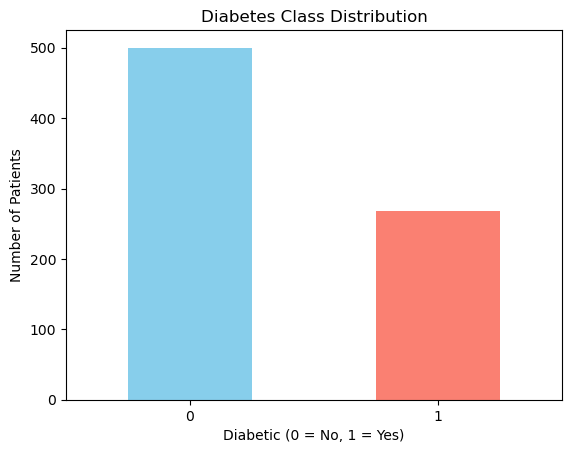

In [11]:
import matplotlib.pyplot as plt

# count of diabetes outcome (0 = not diabetic, 1 = diabetic)
df['diabetic'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])

plt.title('Diabetes Class Distribution')
plt.xlabel('Diabetic (0 = No, 1 = Yes)')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.show()

#### Pie Chart with Labels and Colors

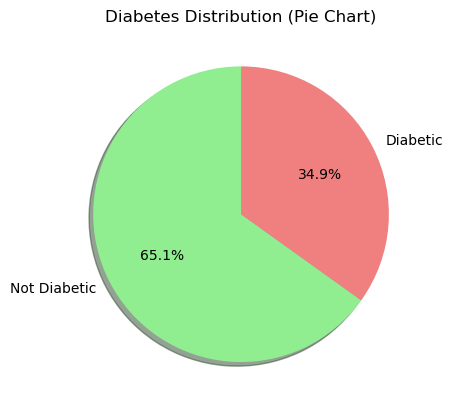

In [12]:
colors = ['lightgreen', 'lightcoral']
labels = ['Not Diabetic', 'Diabetic']

df['diabetic'].value_counts().plot(kind='pie',
                                    labels=labels,
                                    colors=colors,
                                    autopct='%1.1f%%',
                                    startangle=90,
                                    shadow=True)
plt.title('Diabetes Distribution (Pie Chart)')
plt.ylabel('')  # Remove default y-label
plt.show()

#### Scatter Plot with Color Indicating Class (e.g., Diabetic)

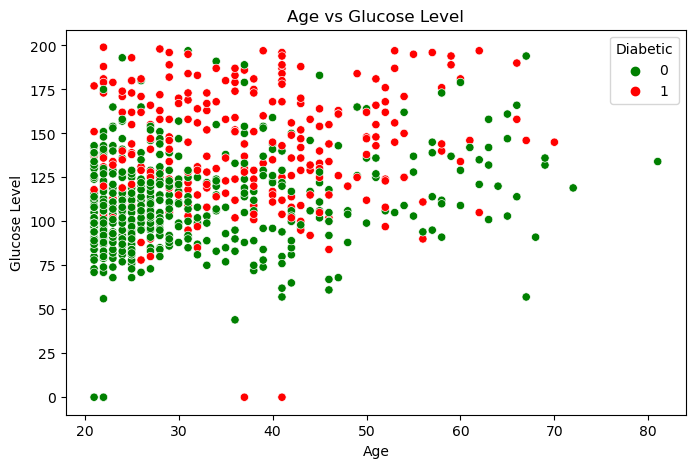

In [13]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='age', y='glucose', hue='diabetic', palette=['green', 'red'])

plt.title('Age vs Glucose Level')
plt.xlabel('Age')
plt.ylabel('Glucose Level')
plt.legend(title='Diabetic')
plt.show()

#### Histogram (e.g., Age)

/usr/local/anaconda3/envs/MSC/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


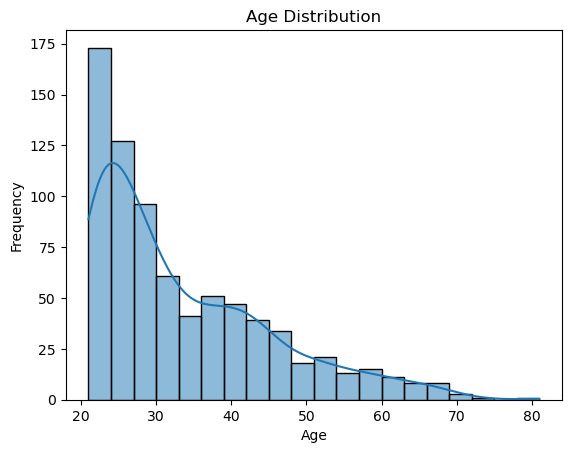

In [14]:
import seaborn as sns
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

#### Box Plot (BMI by Diabetes Status)

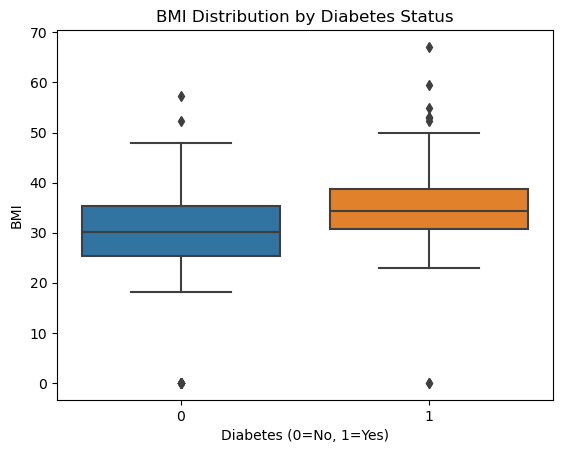

In [15]:
sns.boxplot(x='diabetic', y='bmi', data=df)
plt.title("BMI Distribution by Diabetes Status")
plt.xlabel("Diabetes (0=No, 1=Yes)")
plt.ylabel("BMI")
plt.show()

#### Heatmap (Feature Correlation)

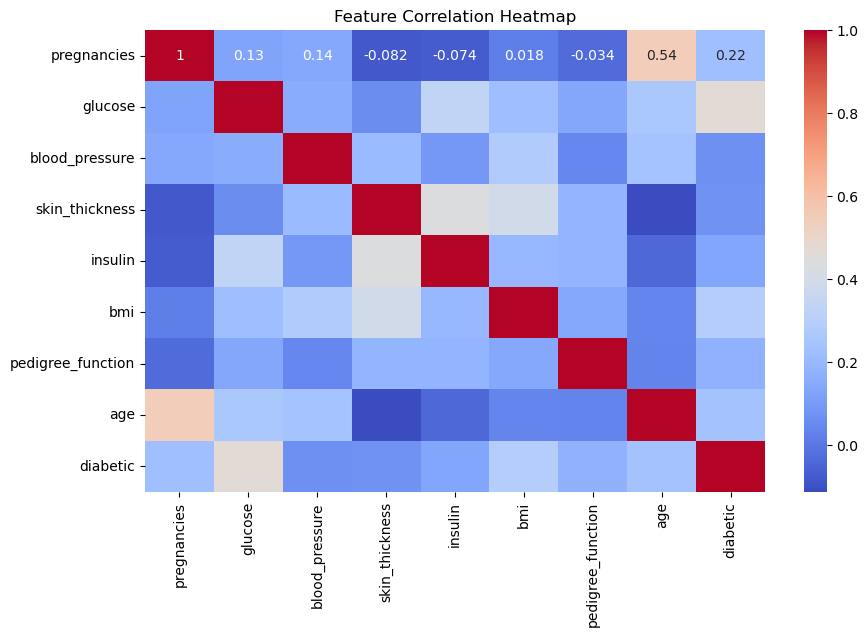

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

#### Pair Plot (Multiple Scatter Plots)

/usr/local/anaconda3/envs/MSC/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/anaconda3/envs/MSC/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/anaconda3/envs/MSC/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/anaconda3/envs/MSC/lib/python3.11/site-packages/s

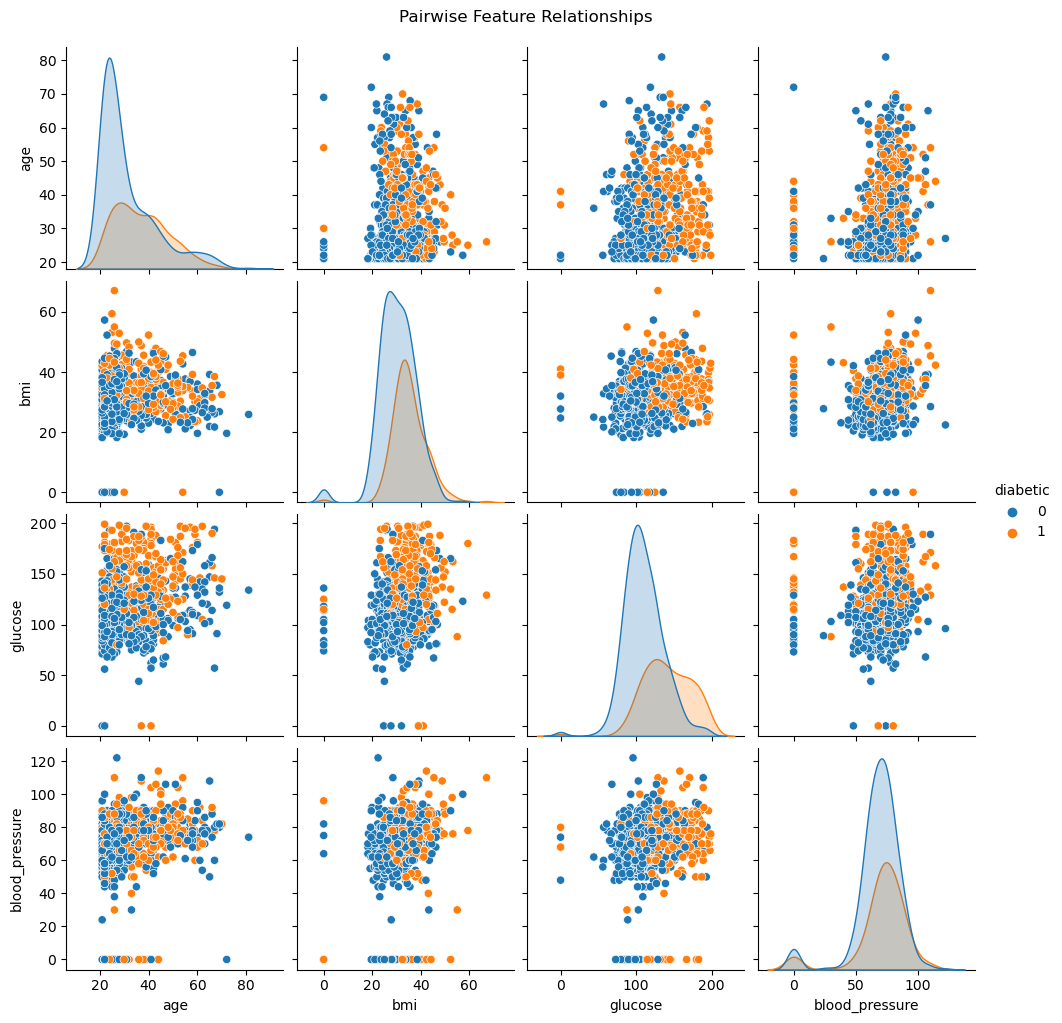

In [17]:
sns.pairplot(df, hue='diabetic', vars=['age', 'bmi', 'glucose', 'blood_pressure'])
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()

#### 6. Boxplots for Outliers

In [18]:
import os

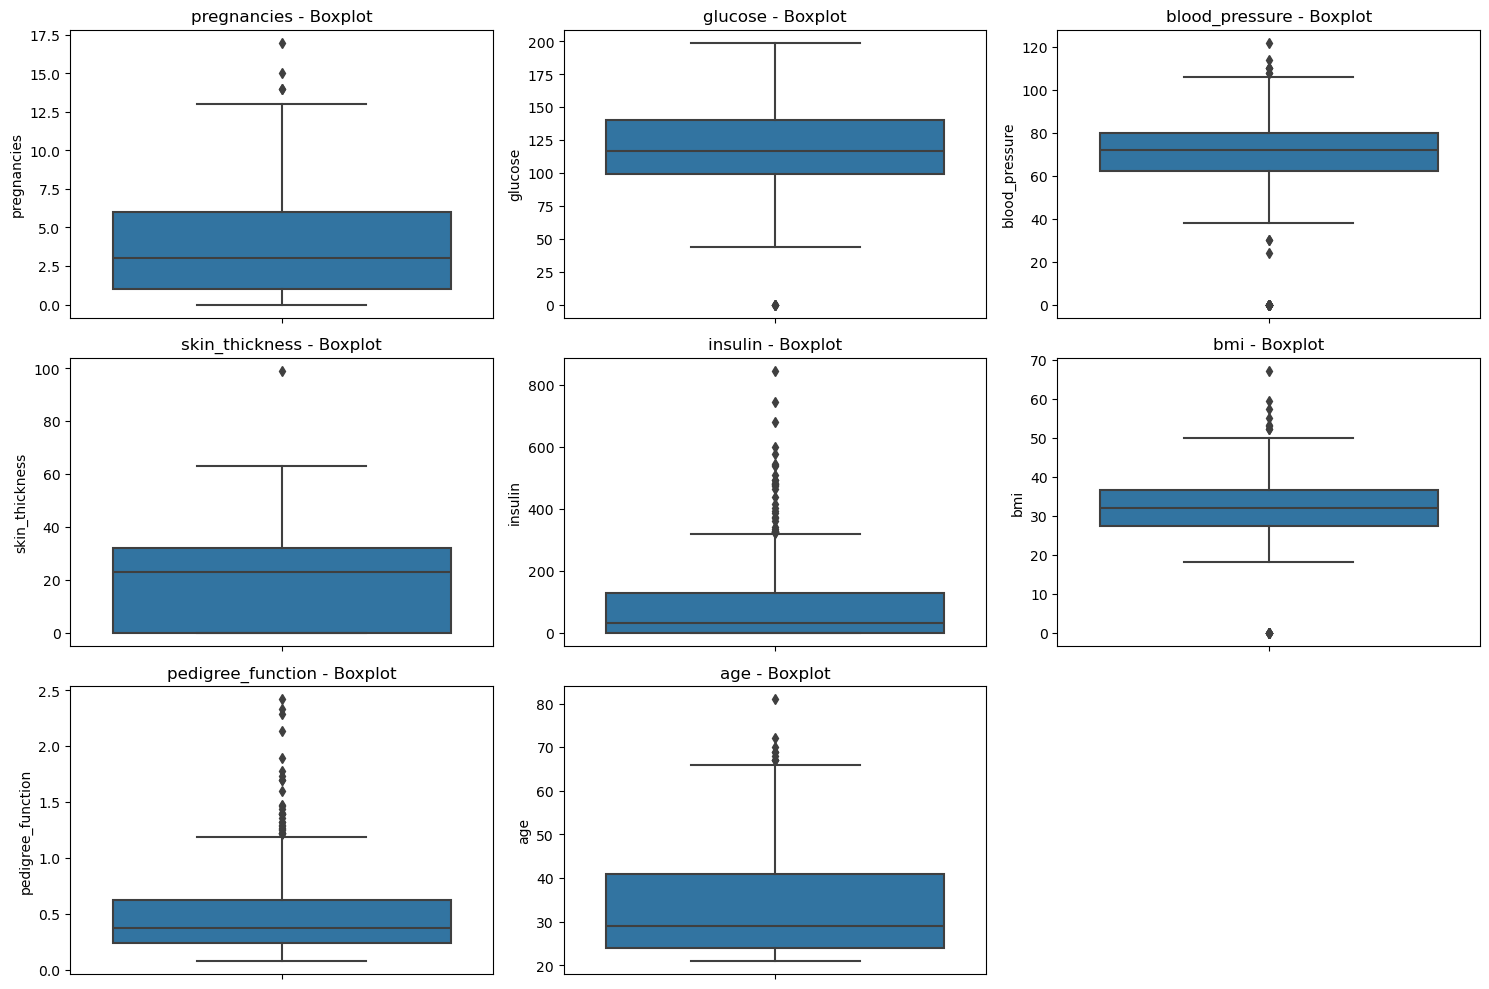

In [19]:
features = df.columns[:-1]  # Exclude target

# Create folder
os.makedirs("/Users/csadminpro16gb/Projects/ML/diabetes-prediction-app/reports/figures", exist_ok=True)

plt.figure(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, y=col)
    plt.title(f'{col} - Boxplot')
plt.tight_layout()

# Save the figure
plt.savefig("../reports/figures/feature_boxplots.png") 

plt.show()


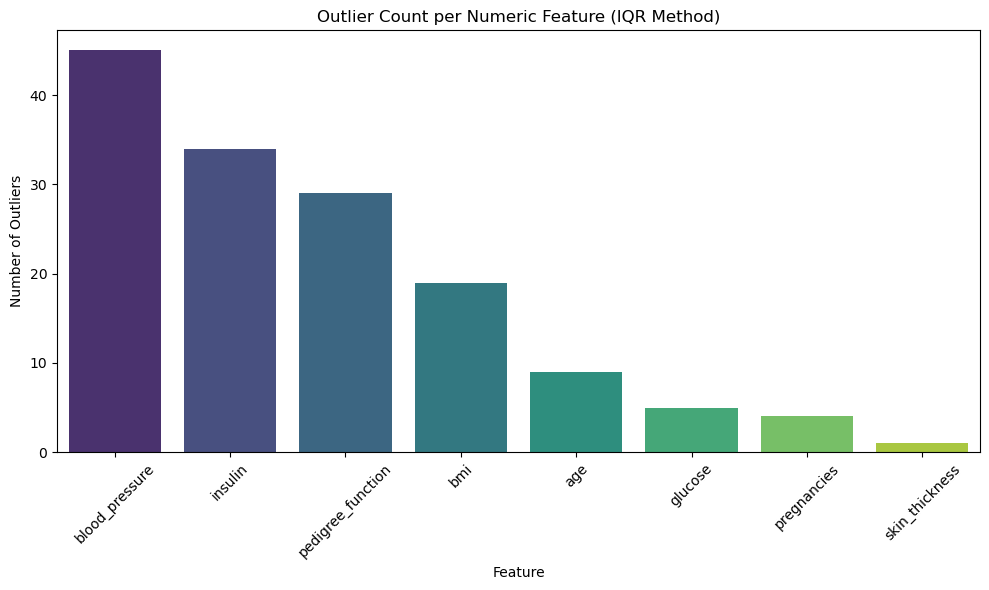

In [20]:
# Select numeric columns except target
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('diabetic')

# Dictionary to store outlier counts
outlier_counts = {}

# IQR outlier detection
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_count = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_counts[col] = outlier_count

# Convert to DataFrame
outlier_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])
outlier_df = outlier_df.sort_values(by='Outlier Count', ascending=False)

# Plot the outlier counts
plt.figure(figsize=(10, 6))
sns.barplot(x=outlier_df.index, y=outlier_df['Outlier Count'], palette='viridis')
plt.title('Outlier Count per Numeric Feature (IQR Method)')
plt.ylabel('Number of Outliers')
plt.xlabel('Feature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Handle Outliers

#####  Remove Outliers Using IQR Method

In [21]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply IQR filtering to all features (except the target 'outcome')
numerical_columns = df.columns.drop('diabetic')
for col in numerical_columns:
    df = remove_outliers_iqr(df, col)

print("Shape after outlier removal:", df.shape)


Shape after outlier removal: (636, 9)


####  Re-check with Boxplots

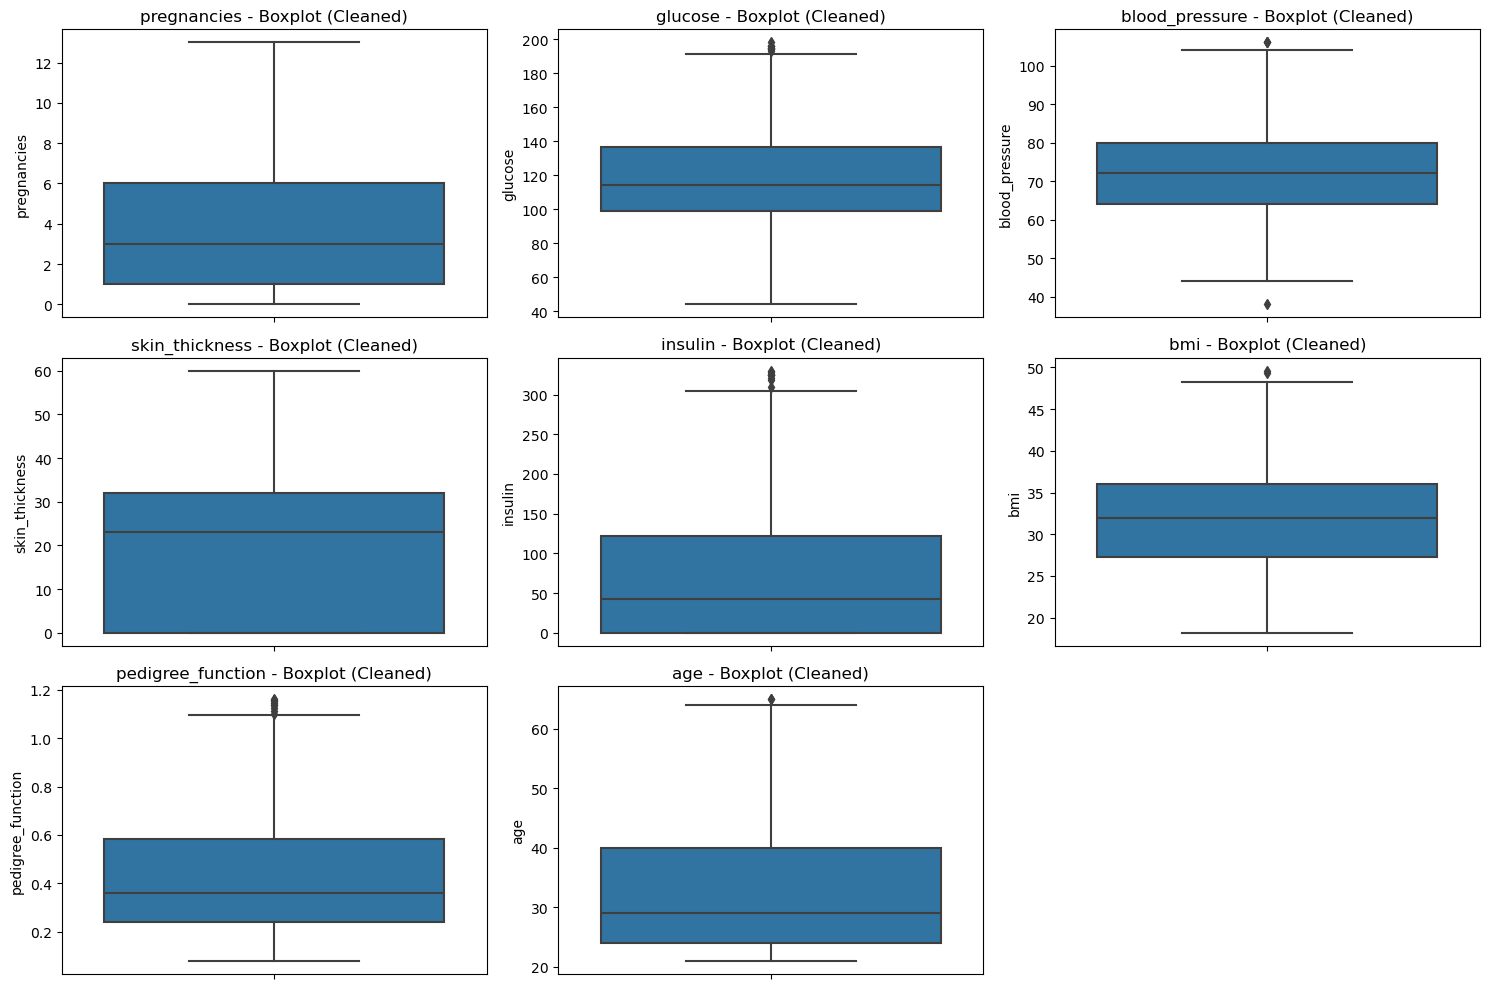

In [22]:
# Replot boxplots after cleaning
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, y=col)
    plt.title(f'{col} - Boxplot (Cleaned)')
plt.tight_layout()
plt.show()


### Save Processed Data as CSV

In [23]:
# Save the cleaned DataFrame to the processed data folder
df.to_csv("../data/processed/diabetes_cleaned.csv", index=False)

print("✅ Cleaned data saved to 'data/processed/diabetes_cleaned.csv'")


✅ Cleaned data saved to 'data/processed/diabetes_cleaned.csv'
